# Bottom Line Up Front (BLUF)
Since RealIris farm needs to sort the flowers out by the types Virginica and Versicolor we use the Perceptron method and Adaline method. Both models did not achieve 100% accuracy, however, the Adaline model gave a higher accuracy score as seen from the confusion matrices. Therefore, we would recommend that RealIris farm uses our Adaline classifier to sort their flowers.

#**Perceptron**

1. Object-oriented API implementation of the Perceptron algorithm
2. Iris data (classifying *versicolor* vs *virginica*)
4. sklearn implementation
5. Conclusions

In [28]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [29]:
# Import libraries
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
# Define Perceptron class
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """

    # Constructor used to create Percepytron objects
    # NOte that eta defaults to 0.01, and n_iter to 50.
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # Initialize weights to small random mumbers, and initialize errors to be an empty list
        rgen = np.random.RandomState(self.random_state)                   # Initialize random number generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   # weights are initially normal variates with a mean of 0 and a standard deviation of 0.01
        self.errors_ = []

        # For n_iter iterations, compute predictions and updates, update weights, and compute and record errors
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # Function that calculates weighted input of Perceptron
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Function that applies step function to net_input to calculate and return output of Perceptron 
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [31]:
# Confusion Matrix & Accuracy

# This mplements a 2D confusion matrix calculation
def confusion_matrix(y_hat,y):
  confusion = np.zeros([2,2])
  for i in range(0,len(y)):
    if (y_hat[i] == 1) & (y[i] == 1):
      confusion[1,1] = confusion[1,1] + 1
    if (y_hat[i] == 1) & (y[i] == -1):
      confusion[0,1] = confusion[0,1] + 1 
    if (y_hat[i] == -1) & (y[i] == 1):
      confusion[1,0] = confusion[1,0] + 1 
    if (y_hat[i] == -1) & (y[i] == -1): 
      confusion[0,0] = confusion[0,0] + 1 
  return(confusion)


#**2. Iris dataset**

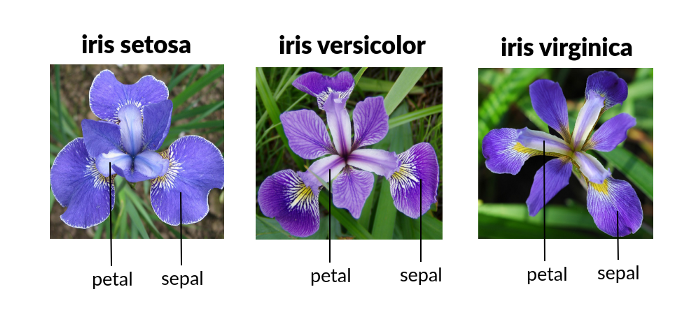
Source: https://medium.com/@naidubhavya06/detailed-explanation-of-exploratory-data-analysis-using-iris-dataset-fa8082a4ce0f Fair use claimed.

In [32]:
# Read iris.data file from UCI Machine Learning Repo into data frame and display its tail (the last five instances)
# The data dictionary for this data set is as follows:
# Column 0: Sepal length (in centimeters)
# Column 1: Sepal width (in centimeters)
# Column 2: Petal length (in centimeters)
# Column 3: Petal width (in centimeters)
# Column 4: Species of iris (setosa/virginica/versicolor)
# The first 50 instances are iris setosa, the next 50 instances are iris versicolor, and the final 50 instances are iris virginica  
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### *Plotting the Iris data*

### *A function for plotting decision regions*

In [6]:
# Function to plot two-variable decision regions of a classifier 
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black') 

###*Confusion Matrix*

tn = true negative, tp = true positive
fn = false negative, fp = false positive

[[tn, fp]
 [fn, tp]]

Accuracy = (tp + tn)/(tp + tn + fp + fn)

### *Training the Perceptron model (versicolor & virginica)*

---



(150, 5)
(85, 2) (85,)


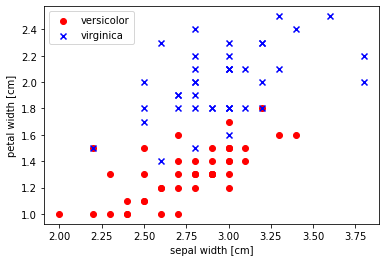

Note that it is LESS easy to separate iris virginica  and iris virginica


In [7]:
# Now classify versicolor vs virginica
%matplotlib inline

# select versicolor and virginica
y = df.iloc[55:140, 4].values                  
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[55:140, [1, 3]].values
print(df.shape)
print(X.shape, y.shape)

# plot data
plt.scatter(X[:45, 0], X[:45, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[45:85, 0], X[45:85, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()
print("Note that it is LESS easy to separate iris virginica  and iris virginica")

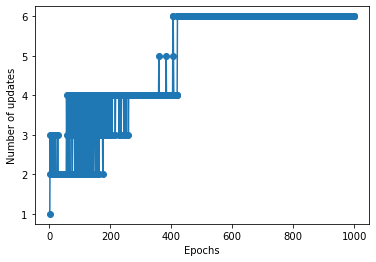

In [8]:
# Create Perceptron object called ppn
ppn = Perceptron(eta=0.01, n_iter=1000)

# Fit Perceptron model to iris data 
ppn.fit(X, y)


plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

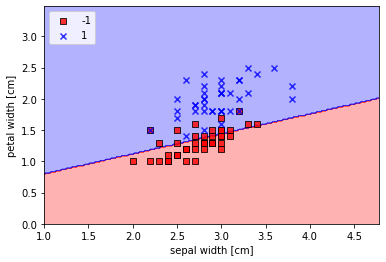

In [9]:
# Plot decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [10]:
# Compute confusion matrix
y_hat = ppn.predict(X)
cm = confusion_matrix(y_hat,y)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix
 [[29. 16.]
 [ 0. 40.]] 

Accuracy =  0.8117647058823529


#**4. sklearn Implementation of Perceptron**

In [24]:
# Split the data into a holdout training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
# Scale predictor data to have mean zero and unit variance
scaler = StandardScaler()
scaler.fit(X_train)   # Obtain scaling parameters from training data
X_train_std = scaler.transform(X_train)    # Now use those parameters to scale the training data
X_test_std = scaler.transform(X_test)          # And test data SEPARATELY (to prevent data leakags)

In [26]:
# Fit a Perceptron model
ppn = sklearn.linear_model.Perceptron(eta0=0.1, max_iter = 100, random_state=12234)

# Train Perceptron
ppn.fit(X_train_std, y_train)

# Predict target values for X_test_std
y_hat = ppn.predict(X_test_std)

# Report confusion matrix and accuracy
cm = confusion_matrix(y_hat,y_test)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy) 

Confusion matrix
 [[ 9.  1.]
 [ 1. 11.]] 

Accuracy =  0.9090909090909091


# Adaline

1. An Object-Oriented Adaline API (Batch Gradient Descent)
3. Iris Dataset (Versicolor vs Virginica) 
4. Adaline (Stochastic Gradient Descent)
7. Logistic Regression (Optional)
8. SGDClassifier (Optional)

In [14]:
class AdalineGD(object):
    """ADAptive LInear NEuron (Adaline) classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

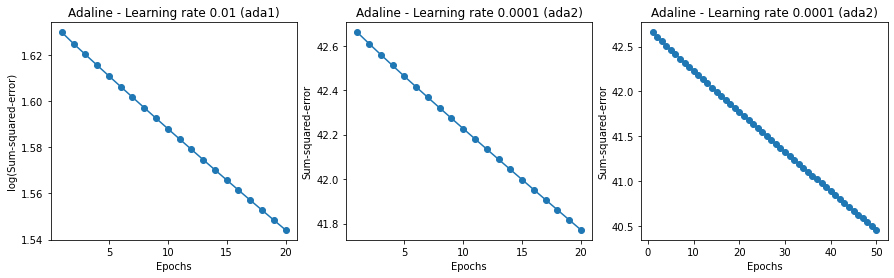

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ada1 = AdalineGD(n_iter=20, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01 (ada1)')

ada2 = AdalineGD(n_iter=20, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001 (ada2)')

ada3 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001 (ada2)')
plt.show()

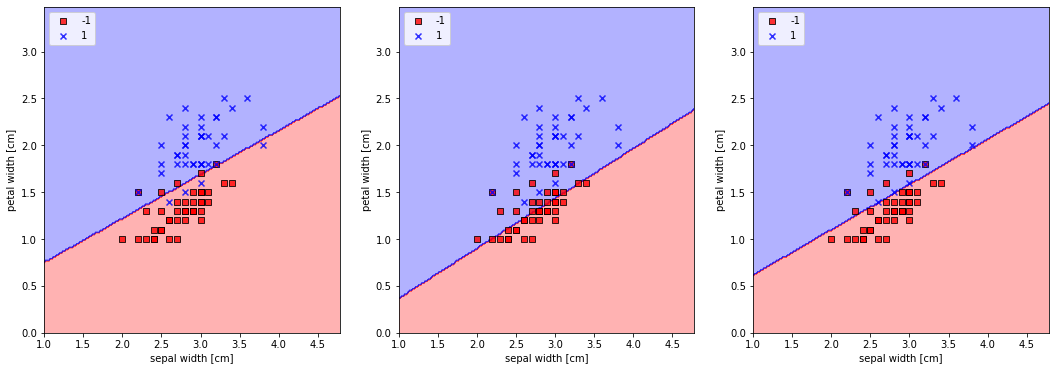

In [16]:
# Plot decision region
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plot_decision_regions(X, y, classifier=ada1)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,2)
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,3)
plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

In [17]:
# Compute confusion matrix
y_hat = ada1.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada1 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada2.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada2 model)\n",cm, "\n\nAccuracy = ",accuracy)  

y_hat = ada3.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada3 model)\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix (ada1 model)
 [[40  5]
 [ 4 36]] 

Accuracy =  0.8941176470588236
Confusion matrix (ada2 model)
 [[27 18]
 [ 0 40]] 

Accuracy =  0.788235294117647
Confusion matrix (ada3 model)
 [[39  6]
 [ 0 40]] 

Accuracy =  0.9294117647058824


## Improving gradient descent through feature scaling

In [18]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

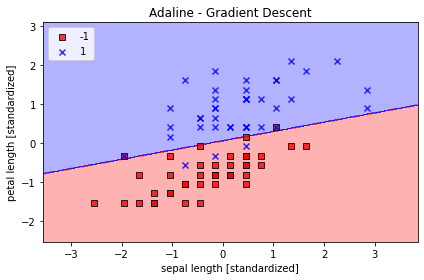

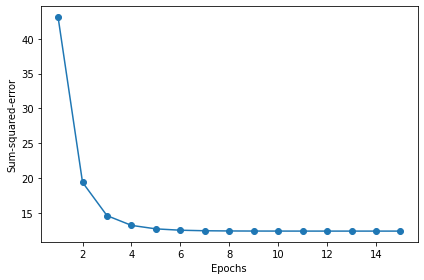

In [19]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [20]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (standardized data model)\n",cm, "\n\nAccuracy = ",accuracy)    
   

Confusion matrix (standardized data model)
 [[43  2]
 [ 3 37]] 

Accuracy =  0.9411764705882353


#**4. Adaline (Stochastic Gradient Descent)**

Instead of using the entire dataset to compute the gradient (as in batch gradient descent), update the weights incrementally for each training instance. Instances have to be presented in random order, and the training set needs to be shuffled every epoch. Called stochastic gradient descent, or iterative/online gradient descent.

Advantages: faster convergence, may escape shallow local optima, and the algorithm is suitable for on-the-fly learning as instances "arrive."

In [21]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

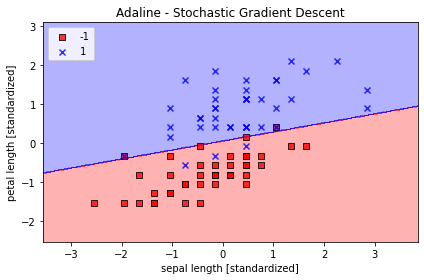

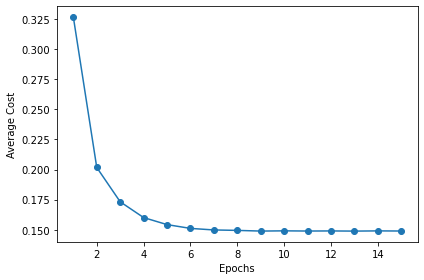

In [22]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [23]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (stochastic gradient descent model)\n",cm, "\n\nAccuracy = ",accuracy)     
   

Confusion matrix (stochastic gradient descent model)
 [[42  3]
 [ 3 37]] 

Accuracy =  0.9294117647058824


#**5. Conclusion**

Perceptron 
1. Distinguishing iris virginica from iris versicolor is a slightly harder problem, and a Perceptron does a reasponable job on this task (accuracy of approximately 81.17%).
2. After training and testing the data, the perceptron gives a accuracy of 90.9%.

Adaline
1. The number of iterations and $\eta$ matter.
2. Stochastic gradient descent may converge faster than batch gradient descent, the accuracy is 92.94%.
3. Scaling may impact performance of gradient descent algorithms favoravbly, the accuracy increased to 94.11%.
